<a href="https://colab.research.google.com/github/sandeepss2020/Neural_Network-DL/blob/main/NNDL_LAB7_RBF_BPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RBFN has oly one hidden node. When data is not linearly separable. We have to convert the data into linearly separable form by two steps - 
*   Increasing the dimensionality (Not Mandetory)
*   Expanding the Direction.(In horizontal... Mandetory) i.e, Changing the direction --> 
We are having three different methods to achieve this 
a) Multiquadratic , b) Inverse multiquadratic, c) Guassian function.
Taking any one data point as a center. 



In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [100]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [181]:
dataset_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

In [182]:
dataset_iris = dataset_iris.drop(columns=['Id',],axis=1)

In [183]:
# dataset_iris.info()

In [184]:
dataset_iris['Species'] = Le.fit_transform(dataset_iris['Species'])

In [185]:
features = dataset_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# print(type(features))

# features_li = features.values.tolist()

# print(type(li))
label = dataset_iris[['Species']]

# label_list = label.values.tolist()

# print(f"Features -> \n {features} \n and Label -> \n {label}")



In [186]:
X = features
y = label
y = pd.get_dummies(y).values

In [187]:
X_train , X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state= 4)

In [201]:
learning_rate = 0.25
iterations = 1500  #5000 can be changed
N = len(y_train)

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 1

results = pd.DataFrame(columns=["mse", "accuracy"])

In [202]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 


In [197]:
def sigmoid(x):
  binary_sig = ( 1 - np.exp(-x))/( 1 + np.exp(-x))
  return binary_sig

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()



In [203]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


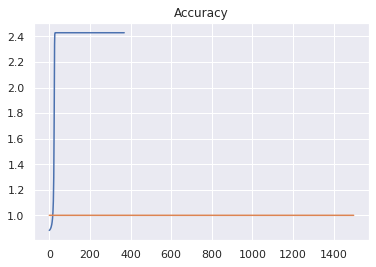

In [204]:
results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")


In [205]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 1.0


In [147]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score

In [173]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target
y = pd.get_dummies(y).values
# y

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)


In [175]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [176]:
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [177]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [178]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    
    
    # Calculating error
    mse = mean_squared_error(A2,y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

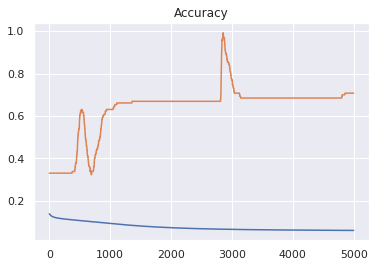

In [179]:
results.mse.plot(title="Mean Squared Error")
results.accuracy.plot(title="Accuracy")

In [180]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8


# ***RBFNN***

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


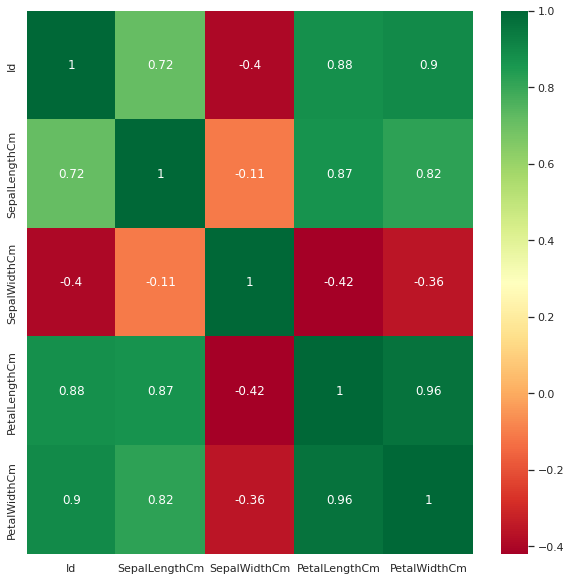

In [8]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def show_correlation_graph(data: pd.DataFrame, figsize: Tuple):
    plt.figure(figsize=figsize)
    corrmat = data.corr()
    top_corr_features = corrmat.index
    sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()

show_correlation_graph(data,(10,10))

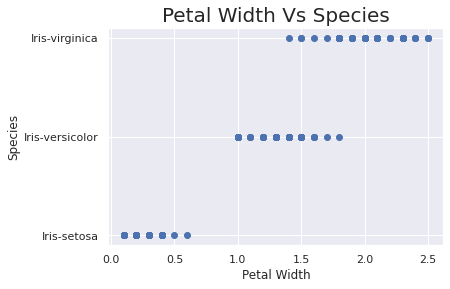

In [9]:
plt.scatter(data['PetalWidthCm'],data['Species'])
plt.xlabel('Petal Width')
plt.ylabel('Species')
plt.title('Petal Width Vs Species', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  


Text(0, 0.5, 'WCSS')

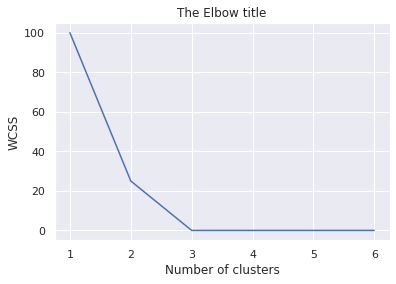

In [12]:
# x= data[['PetalWidthCm']]
x= data[['Species']]
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [71]:
X= data.drop(columns=['Species',],axis=1)
# X =  data[['PetalWidthCm','PetalLengthCm']]
y = data[['Species']]
# X_train , X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state= 1)

In [87]:
km = KMeans(3)

kmeans.fit(X,y)
y_pred = kmeans.predict(X)
print(y_pred)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
     Species
14         0
98         1
75         1
16         0
131        2
56         1
141        2
44         0
29         0
120        2
94         1
5          0
102        2
51         1
78         1
42         0
92         1
66         1
31         0
35         0
90         1
84         1
77         1
40         0
125        2
99         1
33         0
19         0
73         1
146        2
91         1
135        2
69         1
128        2
114        2
48         0
53         1
28         0


In [32]:
from sklearn import metrics

In [88]:
confusion_matrix = metrics.confusion_matrix(y, y_pred)
print(confusion_matrix)

[[ 0 50  0]
 [25 25  0]
 [50  0  0]]


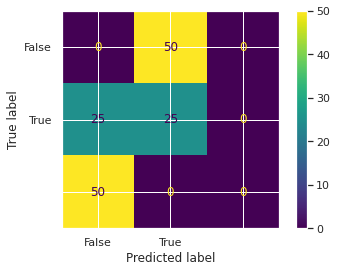

In [89]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [90]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

-1.75

In [91]:
Accuracy = metrics.accuracy_score(y, y_pred)
print(Accuracy)

0.16666666666666666


In [92]:
kmeans.inertia_

70616.29893333334

In [98]:
labels = kmeans.labels_
# print(labels)
# print(len(labels))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [94]:
y=y.values.reshape(150,1)

AttributeError: ignored

In [95]:
print(y)
print(y_pred)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0

In [96]:
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
# print(correct_labels)
print(f"Result: {correct_labels[0]} out of {len(y)} samples were correctly labeled.")

Result: 50 out of 150 samples were correctly labeled.


In [97]:
Accuracyscore = (correct_labels[0]/float(y.size))
print('Accuracy score: {0:0.2f}'. format(Accuracyscore))


Accuracy score: 0.33


USING SCIKIT

In [46]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

# import some data to play with
iris = datasets.load_iris()
X = iris.data 
y = iris.target
names = iris.feature_names
X, y = shuffle(X, y, random_state=42)

In [47]:
model = KMeans(n_clusters=3, random_state=42) 
iris_kmeans = model.fit(X)

In [48]:
iris_kmeans.labels_

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2], dtype=int32)

In [49]:
y = np.choose(y, [1, 2, 0]).astype(int)
y

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])

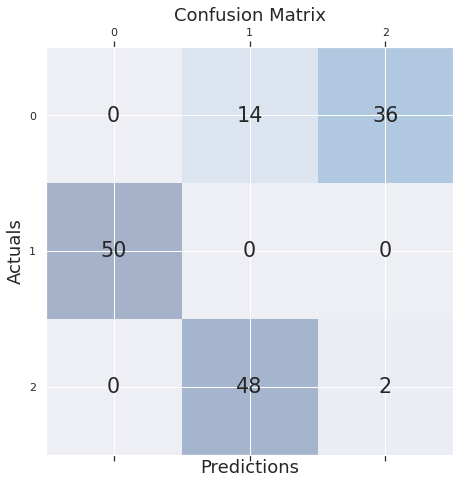

In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, iris_kmeans.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
iris_kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

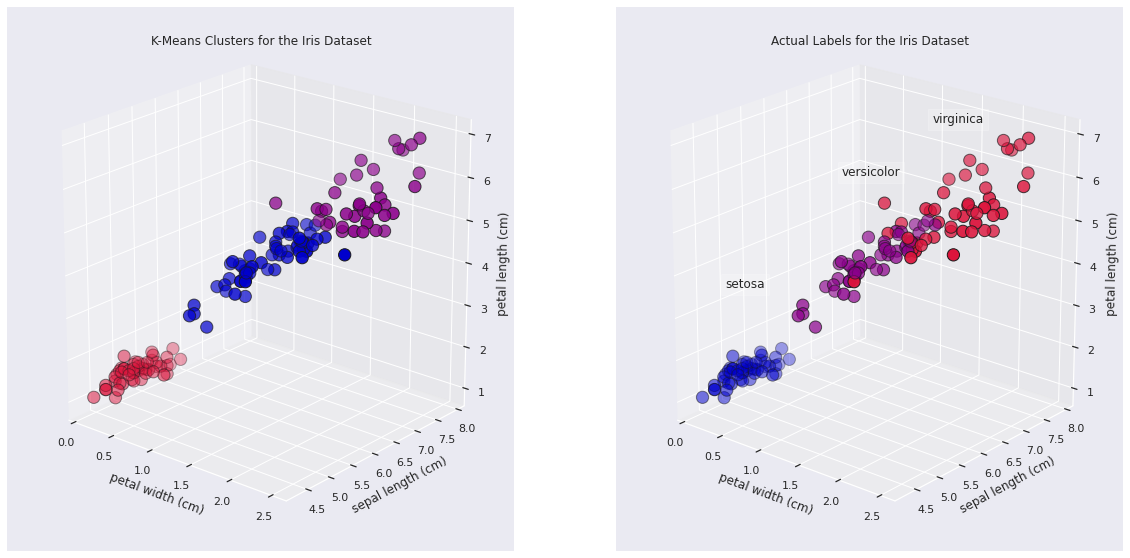

In [52]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=iris_kmeans.labels_.astype(float), 
           edgecolor="k", s=150, cmap=customcmap)
ax1.view_init(20, -50)
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=12)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for label, name in enumerate(['virginica','setosa','versicolor']):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax2.scatter(X[:, 3], X[:, 0], X[:, 2], 
            c=y, edgecolor="k", s=150, 
            cmap=customcmap)
ax2.view_init(20, -50)
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[0], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=12)
fig.show()